coefficients = [ 10 -20   1   1]
estimated coefficients = [  7.33891685 -19.363651     1.1789242    0.96409381]


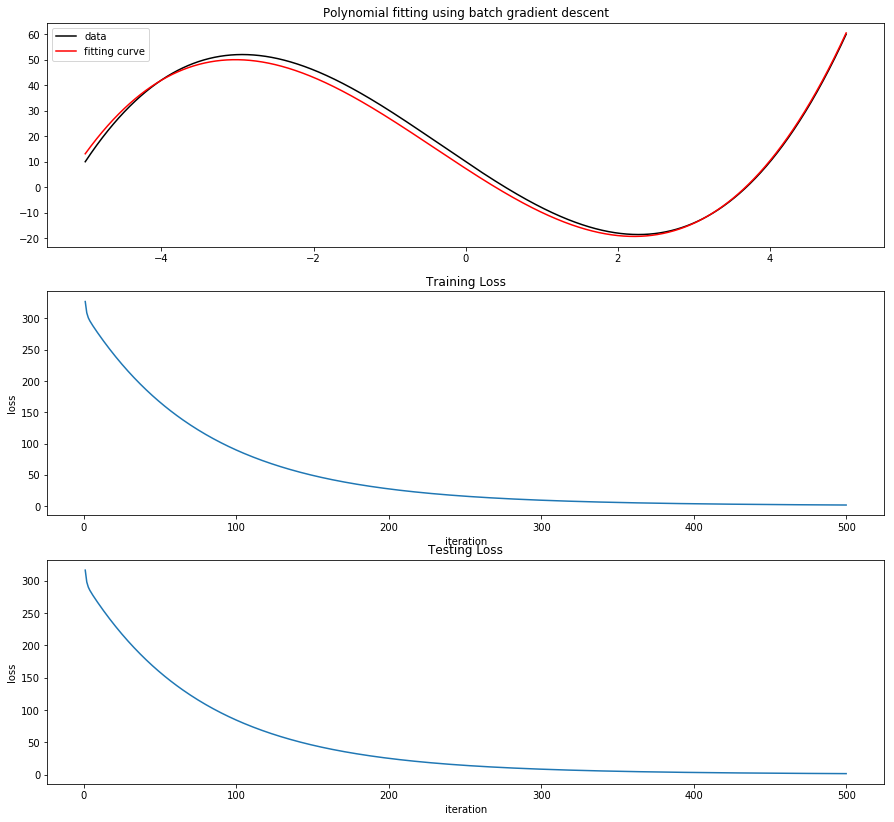

In [5]:
## Polynomial fitting using batch gradient descent
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

## Generate the polynomial and plot the curve
xrange=5;
w = np.array([10,-20,1,1]) # coefficients
x = np.linspace(-xrange, xrange, 10000)
y = 0
for i in range(len(w)):
    y = y + w[i]*(x**i)
plt.figure(figsize=(15,14))
plt.subplot(311)
plt.plot(x,y,'k') 

## Generate training data randomly
def getdata(sample_num):
    x_train=np.random.rand(sample_num)*2*xrange-xrange
    y_train=0
    for i in range(len(w)):
        y_train=y_train+w[i]*(x_train**i)   
    return [x_train,y_train]
    
## Set training parameters
learning_rate = 0.0001
max_iteration = 500
training_set_size = 700
batch_num = 50
test_set_size = 300
model_capacity = len(w)  ## highest degree of polynomial model

## Training iteration
w_train = np.random.rand(model_capacity) # estimated coefficients
batch_size = int(training_set_size / batch_num)
training_loss=np.zeros(max_iteration)
test_loss=np.zeros(max_iteration)

x_test, y_test=getdata(test_set_size)
x_train,y_train=getdata(training_set_size)
for it in range(max_iteration):
    for batch in range(batch_num):    
        xt=np.array(x_train[batch*batch_size:(batch+1)*batch_size])
        yt=np.array(y_train[batch*batch_size:(batch+1)*batch_size])

        pred=np.zeros(batch_size)
        for i in range(len(w_train)):
            pred=pred+w_train[i]*(xt**i)        
                
        gredient=np.zeros(len(w_train))   
        for i in range(len(w_train)):
            gredient[i]=gredient[i]+np.mean((pred-yt)*(xt**i))              
        w_train=w_train-learning_rate*gredient  # update parameters using gradient
    
    pred=np.zeros(training_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_train**i)
    training_loss[it]=np.mean((pred-y_train)**2)/2
    
    pred=np.zeros(test_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_test**i)
    test_loss[it]=np.mean((pred-y_test)**2)/2
    
## Print results
print("coefficients =",w)
print("estimated coefficients =",w_train)
y=0
for i in range(len(w_train)):
    y=y+w_train[i]*(x**i)
plt.plot(x, y,'r') 
plt.legend(['data','fitting curve'])
plt.title("Polynomial fitting using batch gradient descent")
plt.subplot(312)
plt.plot(np.linspace(1, len(training_loss), len(training_loss)),training_loss) 
plt.title('Training Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(313)
plt.plot(np.linspace(1, len(test_loss), len(test_loss)),test_loss) 
plt.title('Testing Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

coefficients = [ 10 -20   1   1]
estimated coefficients = [  9.99999793 -20.00000018   1.00000015   1.00000003]


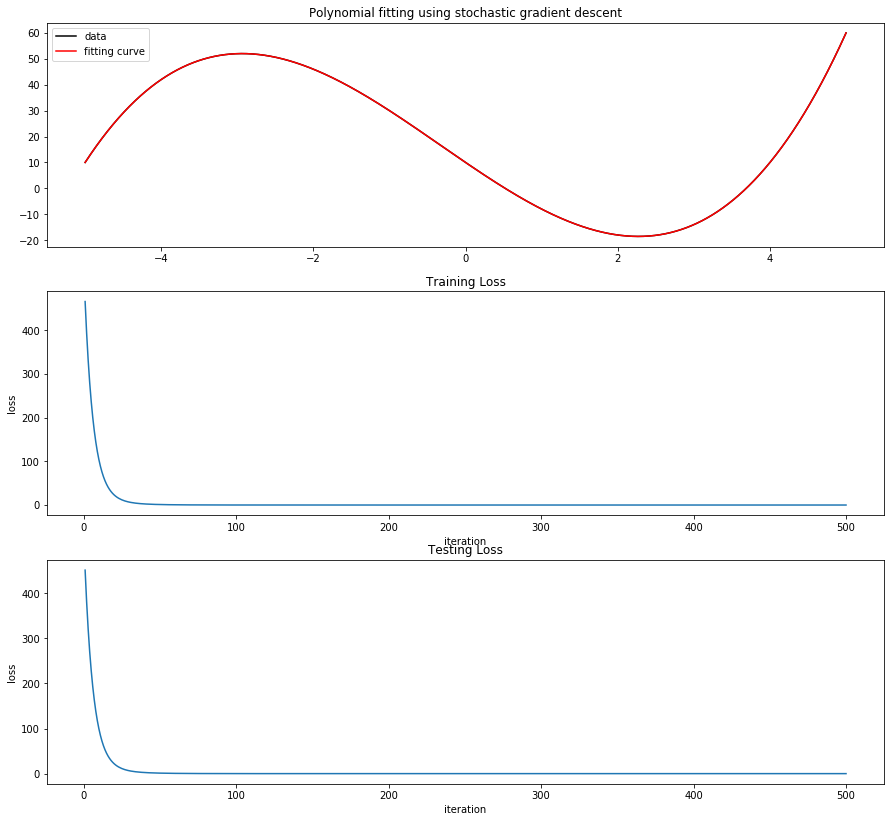

In [2]:
## Polynomial fitting using stochastic gradient descent

## Set training parameters
learning_rate = 0.0001
max_iteration = 500
training_set_size = 700
batch_num = 700        # one sample per iteration   
test_set_size = 300
model_capacity = len(w)   ## highest degree of polynomial model

## Training iteration
w_train = np.random.rand(model_capacity) # estimated coefficients
batch_size = int(training_set_size / batch_num)
training_loss=np.zeros(max_iteration)
test_loss=np.zeros(max_iteration)

for it in range(max_iteration):
    for batch in range(batch_num):    
        xt=np.array(x_train[batch*batch_size:(batch+1)*batch_size])
        yt=np.array(y_train[batch*batch_size:(batch+1)*batch_size])

        pred=np.zeros(batch_size)
        for i in range(len(w_train)):
            pred=pred+w_train[i]*(xt**i)        
                
        gredient=np.zeros(len(w_train))   
        for i in range(len(w_train)):
            gredient[i]=gredient[i]+np.mean((pred-yt)*(xt**i))              
        w_train=w_train-learning_rate*gredient  # update parameters using gradient
    
    pred=np.zeros(training_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_train**i)
    training_loss[it]=np.mean((pred-y_train)**2)/2
    
    pred=np.zeros(test_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_test**i)
    test_loss[it]=np.mean((pred-y_test)**2)/2
    
## Print results
print("coefficients =",w)
print("estimated coefficients =",w_train)
y = 0
for i in range(len(w)):
    y = y + w[i]*(x**i)
plt.figure(figsize=(15,14))
plt.subplot(311)
plt.plot(x,y,'k') 
y = 0
for i in range(len(w_train)):
    y = y + w_train[i]*(x**i)
plt.plot(x, y,'r') 
plt.legend(['data','fitting curve'])
plt.title("Polynomial fitting using stochastic gradient descent")
plt.subplot(312)
plt.plot(np.linspace(1, len(training_loss), len(training_loss)),training_loss) 
plt.title('Training Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(313)
plt.plot(np.linspace(1, len(test_loss), len(test_loss)),test_loss) 
plt.title('Testing Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

coefficients = [ 10 -20   1   1]
estimated coefficients = [ 0.48503285  0.32681875  1.28946244 -1.88371662  0.01645442  0.08767374]


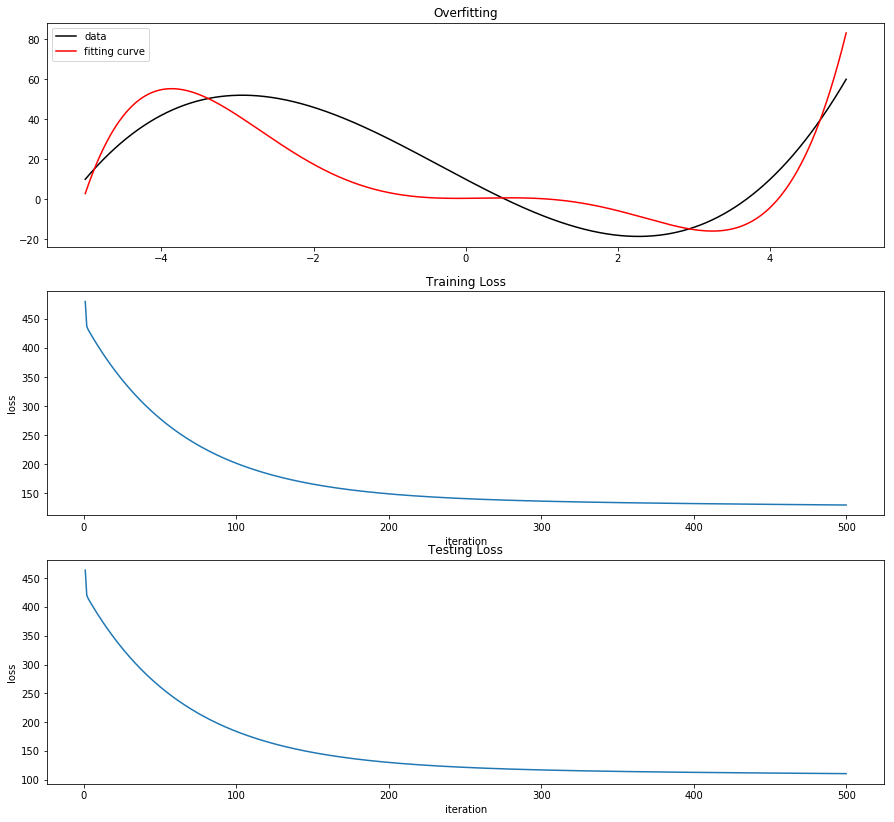

In [3]:
## Overfitting: train high degree polynomial model to fit low degree polynomial

## Set training parameters
learning_rate = 0.0000001
max_iteration = 500
training_set_size = 700
batch_num = 700        # one sample per iteration   
test_set_size = 300
model_capacity = len(w)+2   ## highest degree of polynomial model

## Training iteration
w_train = np.random.rand(model_capacity) # estimated coefficients
batch_size = int(training_set_size / batch_num)
training_loss=np.zeros(max_iteration)
test_loss=np.zeros(max_iteration)

for it in range(max_iteration):
    for batch in range(batch_num):    
        xt=np.array(x_train[batch*batch_size:(batch+1)*batch_size])
        yt=np.array(y_train[batch*batch_size:(batch+1)*batch_size])

        pred=np.zeros(batch_size)
        for i in range(len(w_train)):
            pred=pred+w_train[i]*(xt**i)        
                
        gredient=np.zeros(len(w_train))   
        for i in range(len(w_train)):
            gredient[i]=gredient[i]+np.mean((pred-yt)*(xt**i))              
        w_train=w_train-learning_rate*gredient  # update parameters using gradient
    
    pred=np.zeros(training_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_train**i)
    training_loss[it]=np.mean((pred-y_train)**2)/2
    
    pred=np.zeros(test_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_test**i)
    test_loss[it]=np.mean((pred-y_test)**2)/2
    
## Print results
print("coefficients =",w)
print("estimated coefficients =",w_train)
y = 0
for i in range(len(w)):
    y = y + w[i]*(x**i)
plt.figure(figsize=(15,14))
plt.subplot(311)
plt.plot(x,y,'k') 
y = 0
for i in range(len(w_train)):
    y = y + w_train[i]*(x**i)
plt.plot(x, y,'r') 
plt.legend(['data','fitting curve'])
plt.title("Overfitting")
plt.subplot(312)
plt.plot(np.linspace(1, len(training_loss), len(training_loss)),training_loss) 
plt.title('Training Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(313)
plt.plot(np.linspace(1, len(test_loss), len(test_loss)),test_loss) 
plt.title('Testing Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

coefficients = [ 10 -20   1   1]
estimated coefficients = [11.95911921 -4.91454736  0.84088355]


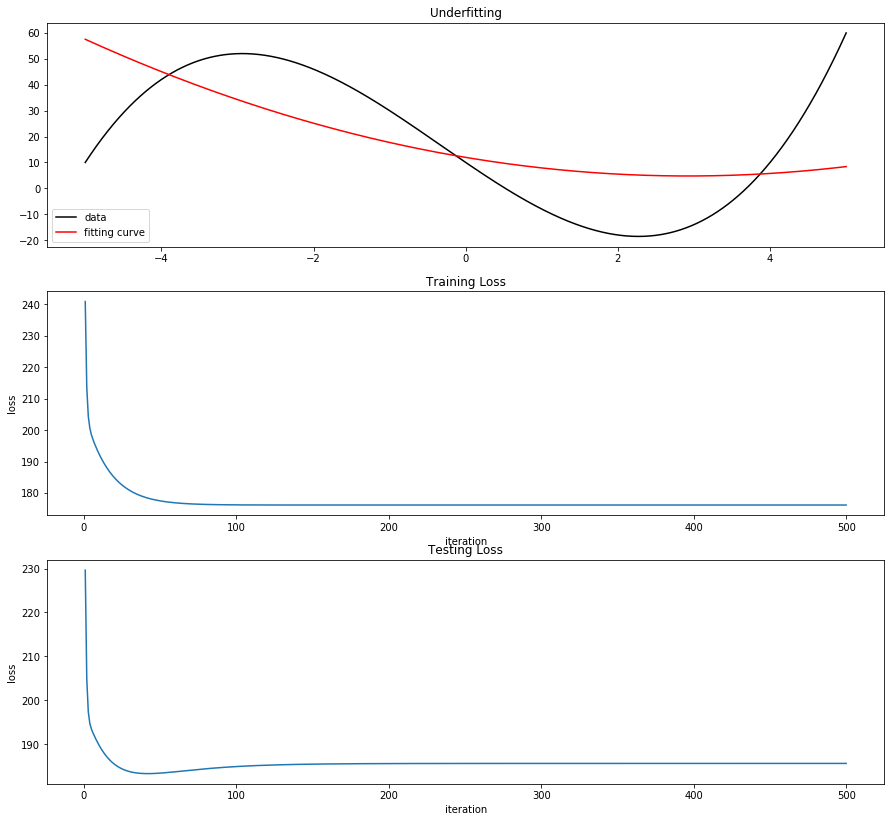

In [4]:
## Underfitting: train low degree polynomial model to fit high degree polynomial

## Set training parameters
learning_rate = 0.0001
max_iteration = 500
training_set_size = 700
batch_num = 700        # one sample per iteration   
test_set_size = 300
model_capacity = len(w)- 1   ## highest degree of polynomial model

## Training iteration
w_train = np.random.rand(model_capacity) # estimated coefficients
batch_size = int(training_set_size / batch_num)
training_loss=np.zeros(max_iteration)
test_loss=np.zeros(max_iteration)

for it in range(max_iteration):
    for batch in range(batch_num):    
        xt=np.array(x_train[batch*batch_size:(batch+1)*batch_size])
        yt=np.array(y_train[batch*batch_size:(batch+1)*batch_size])

        pred=np.zeros(batch_size)
        for i in range(len(w_train)):
            pred=pred+w_train[i]*(xt**i)        
                
        gredient=np.zeros(len(w_train))   
        for i in range(len(w_train)):
            gredient[i]=gredient[i]+np.mean((pred-yt)*(xt**i))              
        w_train=w_train-learning_rate*gredient  # update parameters using gradient
    
    pred=np.zeros(training_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_train**i)
    training_loss[it]=np.mean((pred-y_train)**2)/2
    
    pred=np.zeros(test_set_size)
    for i in range(len(w_train)):
        pred=pred+w_train[i]*(x_test**i)
    test_loss[it]=np.mean((pred-y_test)**2)/2
    
## Print results
print("coefficients =",w)
print("estimated coefficients =",w_train)
y = 0
for i in range(len(w)):
    y = y + w[i]*(x**i)
plt.figure(figsize=(15,14))
plt.subplot(311)
plt.plot(x,y,'k') 
y = 0
for i in range(len(w_train)):
    y = y + w_train[i]*(x**i)
plt.plot(x, y,'r') 
plt.legend(['data','fitting curve'])
plt.title("Underfitting")
plt.subplot(312)
plt.plot(np.linspace(1, len(training_loss), len(training_loss)),training_loss) 
plt.title('Training Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(313)
plt.plot(np.linspace(1, len(test_loss), len(test_loss)),test_loss) 
plt.title('Testing Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()